In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from datetime import timedelta
import matplotlib.ticker as tkr
from sklearn.cluster import KMeans


# Cache Measurements
### latency vs total data written cache-size/journal-size/full/40GB/4KWrites/unbinned/lat_log_lat.1.log

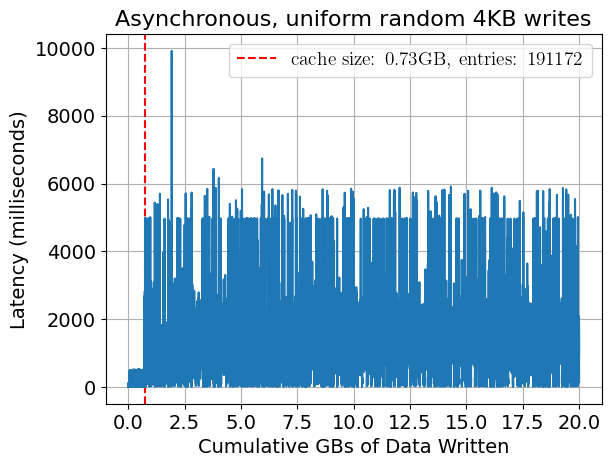

In [2]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache-size/journal-size/full/40GB/4KB/async/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / (10 ** 6)  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
for index, row in df.iterrows():
    if row['latency'] > 1000:
        plt.axvline(x=row['cumulative_gb'], color='r', linestyle='--', label='cache size: ' + str(round(row['cumulative_gb'], 2)) + 'GB,' + ' entries: ' + str(index + 1))
        break

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0, 8000)
#plt.ylim(0, 250)
plt.title('Asynchronous, uniform random 4KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-size_4Kb_writes_20GB.png', bbox_inches='tight')
plt.show()

11.67


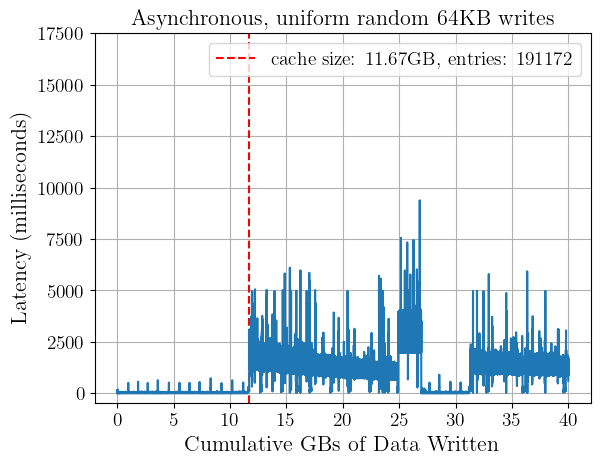

In [3]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache-size/journal-size/full/40GB/64KB/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
index = 191171
writes = df.loc[index, 'cumulative_gb']
print(str(round(writes, 2)))
index = index + 1
plt.axvline(x=writes, color='r', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 64KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-size_64Kb_writes_40GB.png', bbox_inches='tight')
plt.show()

### Latency vs total data written 128K (cache-size/journal-size/full/40GB/128KB_Writes/lat_log_avg_lat.1.log)

23.34


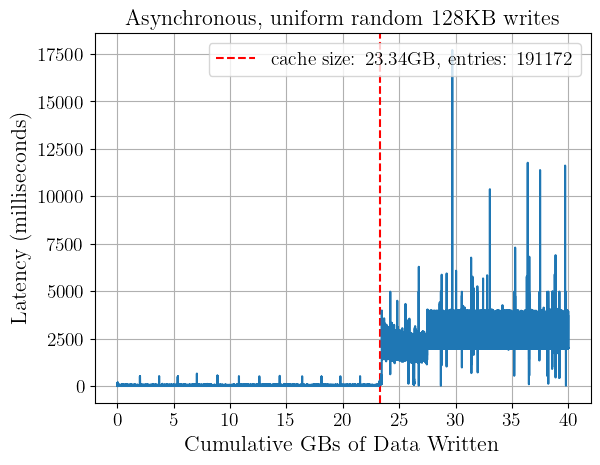

In [4]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache-size/journal-size/full/40GB/128KB/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
index = 191171
writes = df.loc[index, 'cumulative_gb']
print(str(round(writes, 2)))
index = index + 1
plt.axvline(x=writes, color='r', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 128KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-size_128Kb_writes_40GB.png', bbox_inches='tight')
plt.show()

### Latency vs Total Writes written 256KB cache-size/journal-size/full/40GB/256KB_Writes/400GB/round2/lat_log_avg_lat.1.log

28
114688


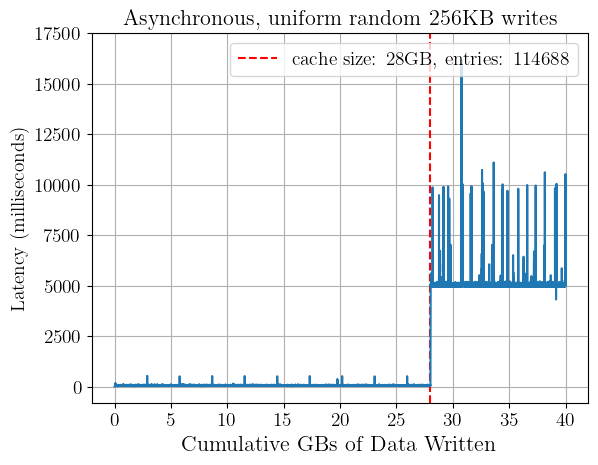

In [5]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache/256K/uniform-random/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency']/ 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
indexobj = df[df['cumulative_gb'] == 28].index
index = indexobj[0] + 1
writes = 28
print(str(round(writes, 2)))
print(index)
plt.axvline(x=writes, color='r', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=14)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 256KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-size_256KB.png', bbox_inches='tight')
plt.show()

### cache-size/journal-size/full/40GB/512KB/400GB/lat_log_avg_lat.1.log

29
59392


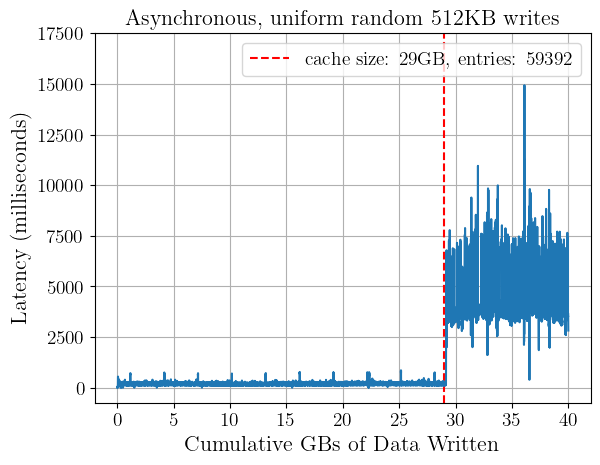

In [6]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache-size/journal-size/full/40GB/512KB/400GB/round2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
indexobj = df[df['cumulative_gb'] == 29].index
index = indexobj[0] + 1
writes = 29
print(str(round(writes, 2)))
print(index)
plt.axvline(x=writes, color='r', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(fontsize=14) #np.arange(0, 20000, 2500))
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 512KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-size_512KB.png', bbox_inches='tight')
plt.show()

28
28672


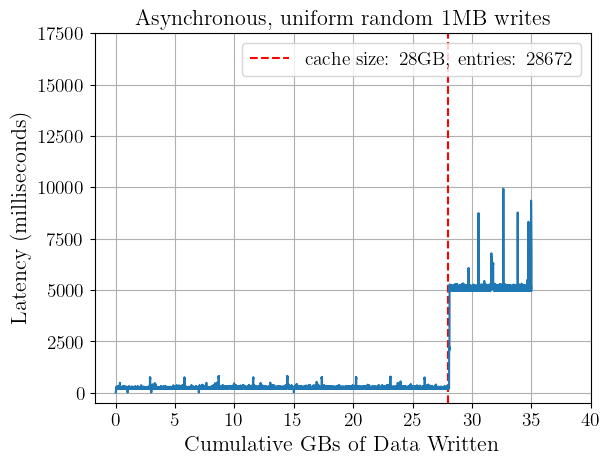

In [7]:
df = pd.read_csv('//home/surbhi/measurements/STL/pause-test/uniform-random/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
indexobj = df[df['cumulative_gb'] == 28].index
index = indexobj[0] + 1
writes = 28
print(str(round(writes, 2)))
print(index)
plt.axvline(x=writes, color='r', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(fontsize=14) #np.arange(0, 20000, 2500))
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-size_1MB.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_703392/1993532154.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111 29127.11111111 29127.11111111 29127.11111111
 29127.11111111]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms


<bound method NDFrame.describe of        index  data_written_bytes  cumulative_gb
0          0           99.594308       0.097260
1          1          104.266693       0.199083
2          2          108.342860       0.304887
3          3           85.472052       0.388355
4          4           97.768838       0.483833
...      ...                 ...            ...
10308  10308            3.318417      80.104306
10309  10309            1.807501      80.106071
10310  10310            1.807501      80.107836
10311  10311            1.746922      80.109542
10312  10312            0.066007      80.109607

[10313 rows x 3 columns]>
Average1: 5
Average2: 101


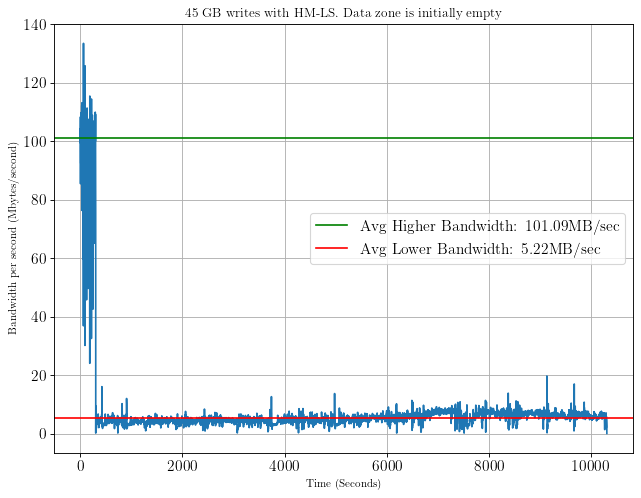

In [8]:
def custom_grouping(index):
    return index // 1000
    
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']
# drive used is sdc. So this is not very useful to us.
df = pd.read_csv('/home/surbhi/measurements/STL/cache-size/journal-size/full/40GB/1MB/400GB/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = round(df['duration']/1000000, ) #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']


# Step 2: Convert submission time and completion time columns to datetime objects with unit as milliseconds
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
#print(df)]

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each  millisecond between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 4K in bytes
    duration_ms = row['duration']
    write_rate_per_ms = write_size_bytes / duration_ms
    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms

# Reset the index to convert the time index to a regular integer index
data_written_ms.reset_index(drop=True, inplace=True)
df_grouped = data_written_ms.groupby(custom_grouping).sum()
# Reset the index to make it a regular column
df_grouped.reset_index(inplace=True)
df_grouped['cumulative_gb'] = df_grouped['data_written_bytes'].cumsum() / (1024 ** 3)
df_grouped['data_written_bytes'] = df_grouped['data_written_bytes'] / (1024 ** 2)
print(df_grouped.describe)

data_array = df_grouped['data_written_bytes'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_array)
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
# Sort cluster centers to get the lowest and highest modes
cluster_centers.sort()
# Calculate the average of each mode
average_mode1 = cluster_centers[0]
average_mode2 = cluster_centers[1]
print("Average1: " + str(round(average_mode1, )))
print("Average2: " + str(round(average_mode2, )))
avg_bw_str1 = str(round(average_mode1, 2)) + 'MB/sec'
avg_bw_str2 = str(round(average_mode2, 2)) + 'MB/sec'
#fig, ax = plt.subplots()
# Plot the data size over time for each resolution
#fig, ax = plt.subplots()
#ax.set_xlim(0, 8000)
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
myxticks = range(0, 8000, 20)
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
plt.tight_layout()
plt.plot(df_grouped.index, df_grouped['data_written_bytes'])
plt.axhline(y=average_mode2, color='g', linestyle='-', label='Avg Higher Bandwidth: ' + avg_bw_str2)
plt.axhline(y=average_mode1, color='r', linestyle='-', label='Avg Lower Bandwidth: ' + avg_bw_str1)
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Time (Seconds)')
plt.ylabel('Bandwidth per second (Mbytes/second)')
plt.grid(True)  # Optionally, add grid lines
plt.title("45 GB writes with HM-LS. Data zone is initially empty")
plt.savefig('/home/surbhi/measurements/fig/cache/cache-sizebw_1MB.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_703392/3581895996.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 12052.59770115
 12052.59770115 12052.59770115 12052.59770115 120

<bound method NDFrame.describe of       index  data_written_bytes  cumulative_gb
0         0          144.490435       0.141104
1         1          203.223886       0.339565
2         2          154.264760       0.490214
3         3          195.504862       0.681137
4         4          156.088219       0.833567
...     ...                 ...            ...
6545   6545            0.080478      35.077624
6546   6546            0.064713      35.077688
6547   6547            0.036330      35.077723
6548   6548            0.015192      35.077738
6549   6549            0.007445      35.077745

[6550 rows x 3 columns]>
Average1: 1
Average2: 160


/tmp/ipykernel_703392/3581895996.py:103: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 759

<bound method NDFrame.describe of       index  data_written_bytes  cumulative_gb
0         0          134.039931       0.130898
1         1          207.523406       0.333558
2         2          180.609909       0.509935
3         3          188.261293       0.693784
4         4          177.427500       0.867053
...     ...                 ...            ...
4440   4440            0.353371      35.077754
4441   4441            0.342207      35.078088
4442   4442            0.248876      35.078332
4443   4443            0.230331      35.078556
4444   4444            0.005442      35.078562

[4445 rows x 3 columns]>
Average1: 1
Average2: 163


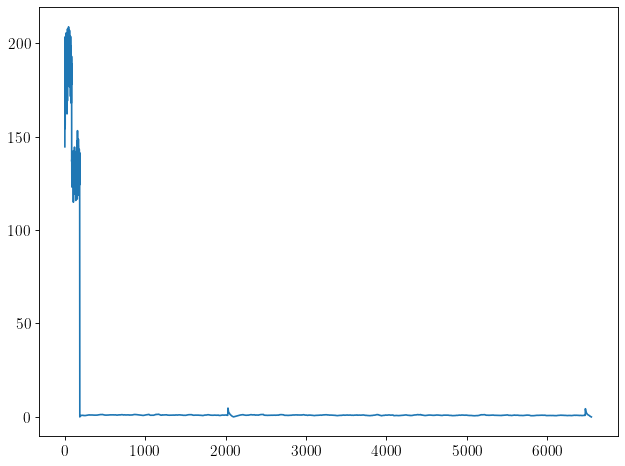

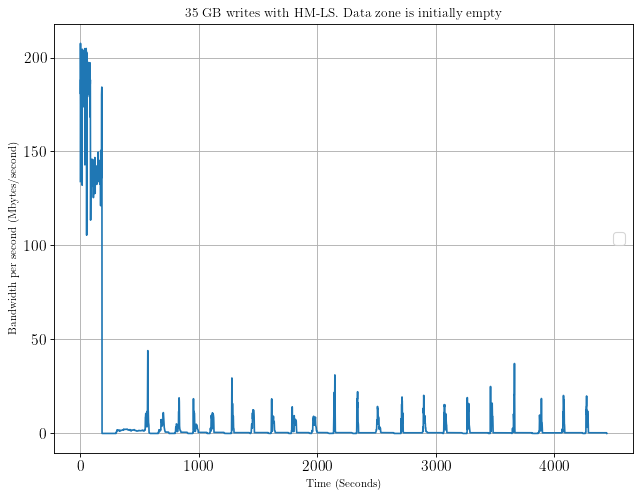

In [9]:
def custom_grouping(index):
    return index // 1000
    
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']
# drive used is sdc. So this is not very useful to us.
df = pd.read_csv('/home/surbhi/measurements/HM-Hybrid/uniform/wakeOneAfterDzone/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = round(df['duration']/1000000, ) #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']


# Step 2: Convert submission time and completion time columns to datetime objects with unit as milliseconds
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
#print(df)]

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each  millisecond between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 4K in bytes
    duration_ms = row['duration']
    write_rate_per_ms = write_size_bytes / duration_ms
    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms

# Reset the index to convert the time index to a regular integer index
data_written_ms.reset_index(drop=True, inplace=True)
df_grouped = data_written_ms.groupby(custom_grouping).sum()
# Reset the index to make it a regular column
df_grouped.reset_index(inplace=True)
df_grouped['cumulative_gb'] = df_grouped['data_written_bytes'].cumsum() / (1024 ** 3)
df_grouped['data_written_bytes'] = df_grouped['data_written_bytes'] / (1024 ** 2)
print(df_grouped.describe)

data_array = df_grouped['data_written_bytes'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_array)
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
# Sort cluster centers to get the lowest and highest modes
cluster_centers.sort()
# Calculate the average of each mode
average_mode1 = cluster_centers[0]
average_mode2 = cluster_centers[1]
print("Average1: " + str(round(average_mode1, )))
print("Average2: " + str(round(average_mode2, )))
avg_bw_str1 = str(round(average_mode1, 2)) + 'MB/sec'
avg_bw_str2 = str(round(average_mode2, 2)) + 'MB/sec'
# Plot the data size over time for each resolution
#fig, ax = plt.subplots()
#ax.set_xlim(0, 7000)
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
myxticks = range(0, 8000, 20)
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.tight_layout()
plt.plot(df_grouped.index, df_grouped['data_written_bytes'])

# drive used is sdc. So this is not very useful to us.
df = pd.read_csv('/home/surbhi/measurements/HM-Hybrid/uniform/wakeOneAfterCzone/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = round(df['duration']/1000000, ) #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']


# Step 2: Convert submission time and completion time columns to datetime objects with unit as milliseconds
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
#print(df)]

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each  millisecond between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 4K in bytes
    duration_ms = row['duration']
    write_rate_per_ms = write_size_bytes / duration_ms
    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms

# Reset the index to convert the time index to a regular integer index
data_written_ms.reset_index(drop=True, inplace=True)
df_grouped = data_written_ms.groupby(custom_grouping).sum()
# Reset the index to make it a regular column
df_grouped.reset_index(inplace=True)
df_grouped['cumulative_gb'] = df_grouped['data_written_bytes'].cumsum() / (1024 ** 3)
df_grouped['data_written_bytes'] = df_grouped['data_written_bytes'] / (1024 ** 2)
print(df_grouped.describe)

data_array = df_grouped['data_written_bytes'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_array)
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
# Sort cluster centers to get the lowest and highest modes
cluster_centers.sort()
# Calculate the average of each mode
average_mode1 = cluster_centers[0]
average_mode2 = cluster_centers[1]
print("Average1: " + str(round(average_mode1, )))
print("Average2: " + str(round(average_mode2, )))
avg_bw_str1 = str(round(average_mode1, 2)) + 'MB/sec'
avg_bw_str2 = str(round(average_mode2, 2)) + 'MB/sec'
# Plot the data size over time for each resolution
#fig, ax = plt.subplots()
#plt.set_xlim(0, 7000)
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
plt.tight_layout()
plt.plot(df_grouped.index, df_grouped['data_written_bytes'])
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Time (Seconds)')
plt.ylabel('Bandwidth per second (Mbytes/second)')
plt.grid(True)  # Optionally, add grid lines
plt.title("35 GB writes with HM-LS. Data zone is initially empty")
plt.savefig('/home/surbhi/measurements/fig/cache/cache-sizebw_1MB.png', bbox_inches='tight')
plt.show()







/tmp/ipykernel_703392/3223960992.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[349525.33333333 349525.33333333 349525.33333333 349525.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms


<bound method NDFrame.describe of       index  data_written_bytes  cumulative_gb
0         0          132.708960       0.129599
1         1          126.010568       0.252656
2         2          125.984042       0.375687
3         3          128.274625       0.500955
4         4          125.282733       0.623302
...     ...                 ...            ...
1369   1369            3.839418      35.108000
1370   1370            3.702568      35.111615
1371   1371            2.393939      35.113953
1372   1372            1.133336      35.115060
1373   1373            0.166383      35.115222

[1374 rows x 3 columns]>
Average1: 6
Average2: 124
      index  data_written_bytes  cumulative_gb
235     235          122.788360      28.100805
236     236           84.357764      28.183186
237     237            0.000000      28.183186
238     238            6.081338      28.189124
239     239           14.977778      28.203751
...     ...                 ...            ...
1369   1369          

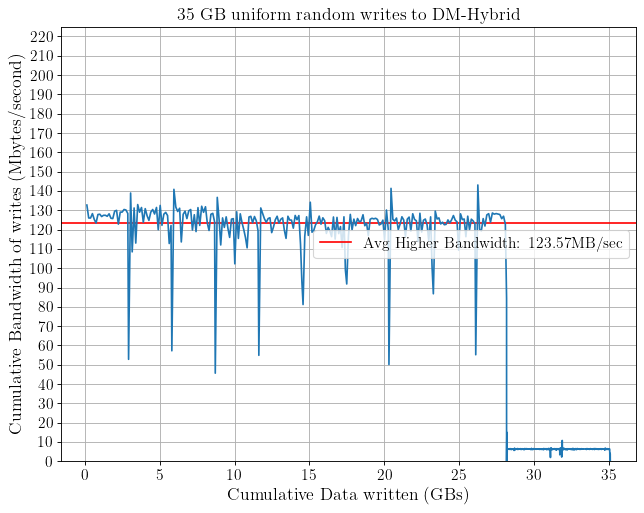

In [10]:
def custom_grouping(index):
    return index // 1000
    
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']
# drive used is sdc. So this is not very useful to us.
df = pd.read_csv('/home/surbhi/measurements/STL/pause-test/uniform-random/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = round(df['duration']/1000000, ) #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']

# Step 2: Convert submission time and completion time columns to datetime objects with unit as milliseconds
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
#print(df)]

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each  millisecond between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 4K in bytes
    duration_ms = row['duration']
    write_rate_per_ms = write_size_bytes / duration_ms
    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms

# Reset the index to convert the time index to a regular integer index
data_written_ms.reset_index(drop=True, inplace=True)
df_grouped = data_written_ms.groupby(custom_grouping).sum()
# Reset the index to make it a regular column
df_grouped.reset_index(inplace=True)
df_grouped['cumulative_gb'] = df_grouped['data_written_bytes'].cumsum() / (1024 ** 3)
df_grouped['data_written_bytes'] = df_grouped['data_written_bytes'] / (1024 ** 2)
print(df_grouped.describe)

data_array = df_grouped['data_written_bytes'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_array)
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
# Sort cluster centers to get the lowest and highest modes
cluster_centers.sort()
# Calculate the average of each mode
average_mode1 = cluster_centers[0]
average_mode2 = cluster_centers[1]
print("Average1: " + str(round(average_mode1, )))
print("Average2: " + str(round(average_mode2, )))
avg_bw_str1 = str(round(average_mode1, 2)) + 'MB/sec'
avg_bw_str2 = str(round(average_mode2, 2)) + 'MB/sec'
# Plot the data size over time for each resolution
#fig, ax = plt.subplots()
#ax.set_xlim(0, 7000)
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Plot vertical lines at x where y is higher than the threshold
print(df_grouped[df_grouped['cumulative_gb'] > 28])
#indexobj = df_grouped[df_grouped['cumulative_gb'] == 28].index
#index = indexobj[0]
#index = 235
#writes = df_grouped.at[235, 'cumulative_gb']
#print(str(round(writes, 2)))
#print(index)
#plt.axvline(x=writes, color='g', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

############
#ax.set_xlim(0, 45)
plt.ylim(0, 225)
myyticks = range(0, 230, 10)
plt.xticks(fontsize=14)
plt.yticks(ticks=myyticks, fontsize=14)
plt.tight_layout()
plt.axhline(y=average_mode2, color='r', linestyle='-', label='Avg Higher Bandwidth: ' + avg_bw_str2)
plt.legend(loc='center right', fontsize=14)
plt.plot(df_grouped['cumulative_gb'], df_grouped['data_written_bytes'])
plt.xlabel('Cumulative Data written (GBs)', fontsize=16)
plt.ylabel('Cumulative Bandwidth of writes (Mbytes/second)', fontsize=16)
plt.grid(True)  # Optionally, add grid lines
plt.title("35 GB uniform random writes to DM-Hybrid", fontsize=16)    
plt.savefig('/home/surbhi/github/surbhi-plots/new/STL/STL_uniform.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_703392/1126024419.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598.37681159
 7598.37681159 7598.37681159 7598.37681159 7598.37681159 7598

<bound method NDFrame.describe of       index  data_written_bytes  cumulative_gb
0         0          134.039931       0.130898
1         1          207.523406       0.333558
2         2          180.609909       0.509935
3         3          188.261293       0.693784
4         4          177.427500       0.867053
...     ...                 ...            ...
4440   4440            0.353371      35.077754
4441   4441            0.342207      35.078088
4442   4442            0.248876      35.078332
4443   4443            0.230331      35.078556
4444   4444            0.005442      35.078562

[4445 rows x 3 columns]>
Average1: 1
Average2: 163


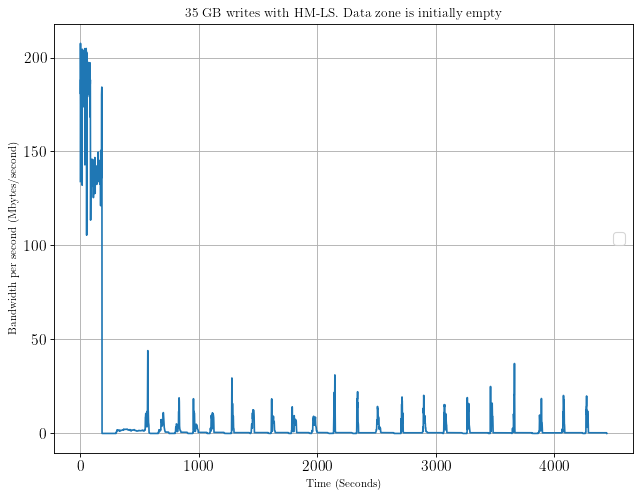

In [11]:
def custom_grouping(index):
    return index // 1000
    
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']
# drive used is sdc. So this is not very useful to us.
df = pd.read_csv('/home/surbhi/measurements/HM-Hybrid/uniform/wakeOneAfterCzone/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = round(df['duration']/1000000, ) #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']


# Step 2: Convert submission time and completion time columns to datetime objects with unit as milliseconds
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
#print(df)]

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each  millisecond between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 4K in bytes
    duration_ms = row['duration']
    write_rate_per_ms = write_size_bytes / duration_ms
    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms

# Reset the index to convert the time index to a regular integer index
data_written_ms.reset_index(drop=True, inplace=True)
df_grouped = data_written_ms.groupby(custom_grouping).sum()
# Reset the index to make it a regular column
df_grouped.reset_index(inplace=True)
df_grouped['cumulative_gb'] = df_grouped['data_written_bytes'].cumsum() / (1024 ** 3)
df_grouped['data_written_bytes'] = df_grouped['data_written_bytes'] / (1024 ** 2)
print(df_grouped.describe)

data_array = df_grouped['data_written_bytes'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_array)
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
# Sort cluster centers to get the lowest and highest modes
cluster_centers.sort()
# Calculate the average of each mode
average_mode1 = cluster_centers[0]
average_mode2 = cluster_centers[1]
print("Average1: " + str(round(average_mode1, )))
print("Average2: " + str(round(average_mode2, )))
avg_bw_str1 = str(round(average_mode1, 2)) + 'MB/sec'
avg_bw_str2 = str(round(average_mode2, 2)) + 'MB/sec'
#fig, ax = plt.subplots()
# Plot the data size over time for each resolution
#fig, ax = plt.subplots()
#ax.set_xlim(0, 8000)
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
myxticks = range(0, 8000, 20)
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.tight_layout()
plt.plot(df_grouped.index, df_grouped['data_written_bytes'])
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Time (Seconds)')
plt.ylabel('Bandwidth per second (Mbytes/second)')
plt.grid(True)  # Optionally, add grid lines
plt.title("35 GB writes with HM-LS. Data zone is initially empty")
plt.savefig('/home/surbhi/measurements/fig/cache/cache-sizebw_1MB.png', bbox_inches='tight')
plt.show()

28
28672


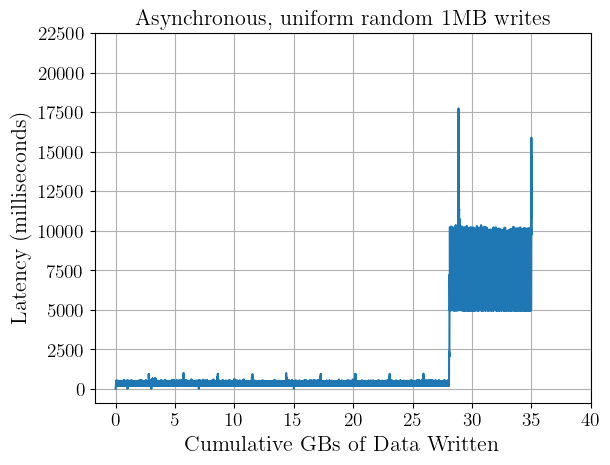

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


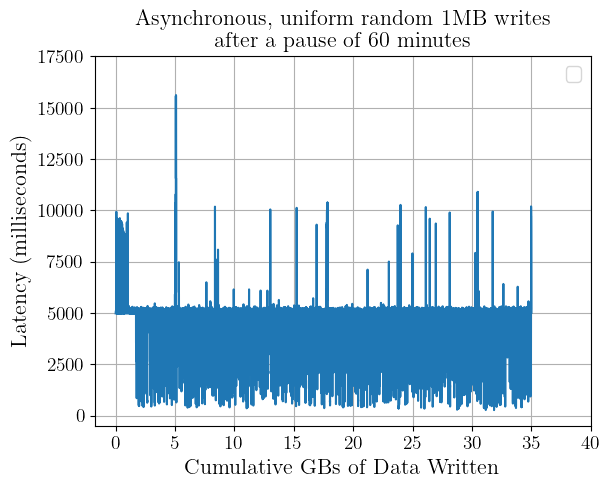

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


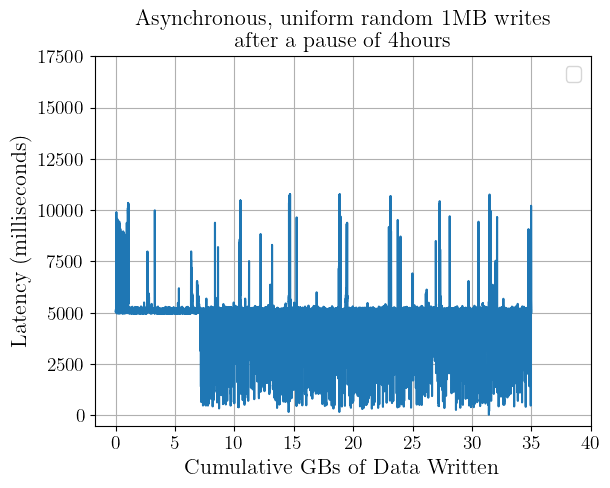

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


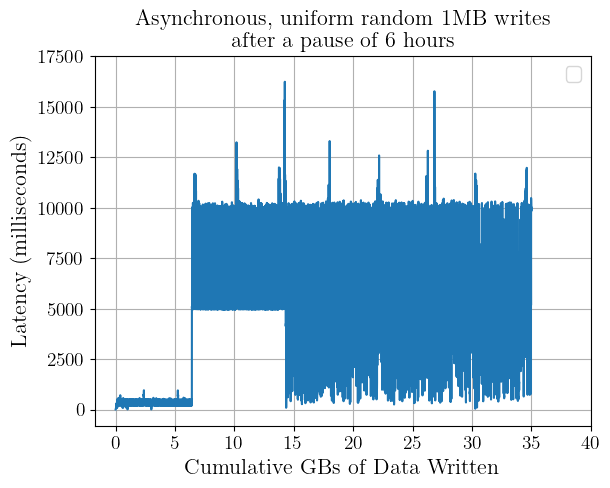

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


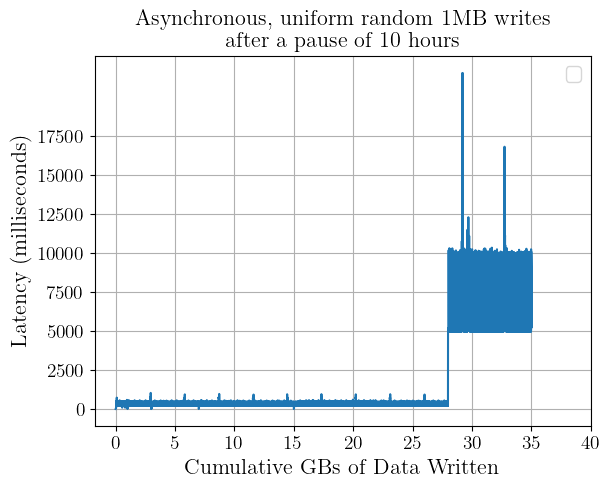

In [12]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Plot vertical lines at x where y is higher than the threshold
indexobj = df[df['cumulative_gb'] == 28].index
index = indexobj[0] + 1
writes = 28
print(str(round(writes, 2)))
print(index)
#plt.axvline(x=writes, color='r', linestyle='--', label='cache size: ' + str(round(writes, 2)) + 'GB,' + ' entries: ' + str(index))

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(fontsize=14) #np.arange(0, 20000, 2500))
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
#plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pause-run1.png', bbox_inches='tight')
plt.show()


df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 60 minutes', fontsize=16)
# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pause-run2.png', bbox_inches='tight')
plt.show()  


df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 4hours', fontsize=16)
# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pause-run3.png', bbox_inches='tight')
plt.show()  

df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 6 hours', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pause-run4.png', bbox_inches='tight')
plt.show()  


df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run5/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 25000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 10 hours', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pause-run5.png', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


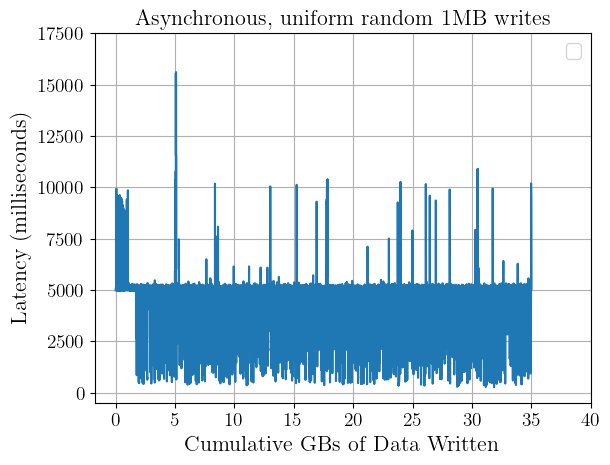

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


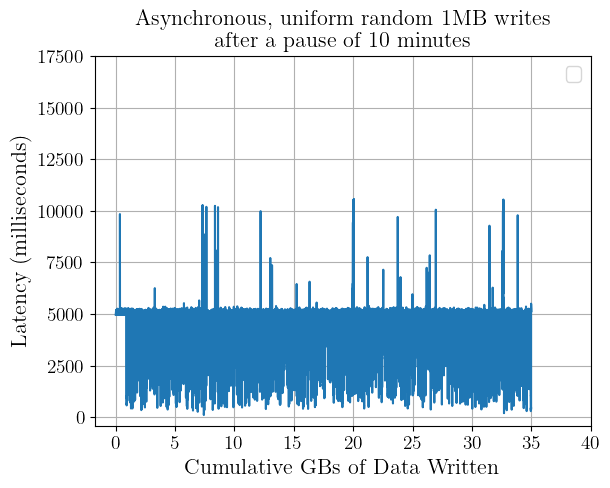

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


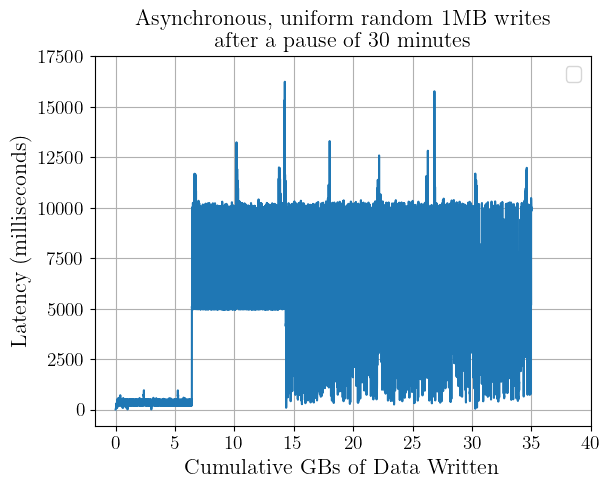

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


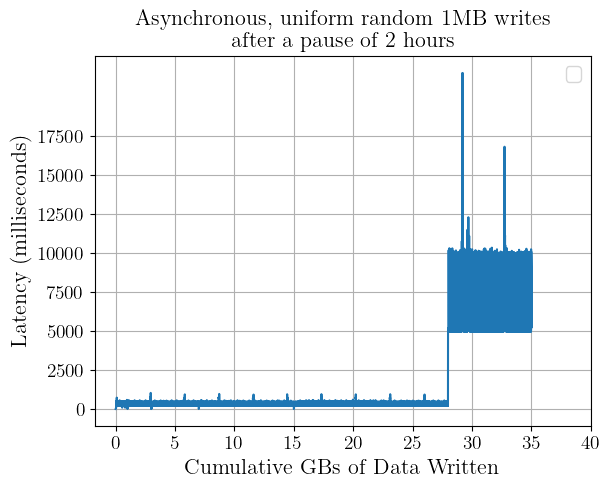

In [13]:
df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pausetest1M-run1.png', bbox_inches='tight')
plt.show()



df = pd.read_csv('/home/surbhi/measurements/STL/pause-test/uniform-random/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 10 minutes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pausetest1M-run2.png', bbox_inches='tight')
plt.show()


df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 30 minutes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pausetest1M-run3.png', bbox_inches='tight')
plt.show()


df = pd.read_csv('/home/surbhi/measurements/STL/cache/uniform-random/run5/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)

# Create the line plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 20000, 2500), fontsize=14)
plt.title('Asynchronous, uniform random 1MB writes \n after a pause of 2 hours', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('/home/surbhi/measurements/fig/cache/cache-pausetest1M-run4.png', bbox_inches='tight')
plt.show()

---------------------------------------------------

# Pause tests 256KB writes, different pauses

### Run1

In [14]:
df = pd.read_csv('cache-size/cleaning-stop/256KBWrite/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')


#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 15000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/pause_test_256KB_writes_run1.pdf', bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cache-size/cleaning-stop/256KBWrite/run1/lat_log_avg_lat.1.log'

### Run2

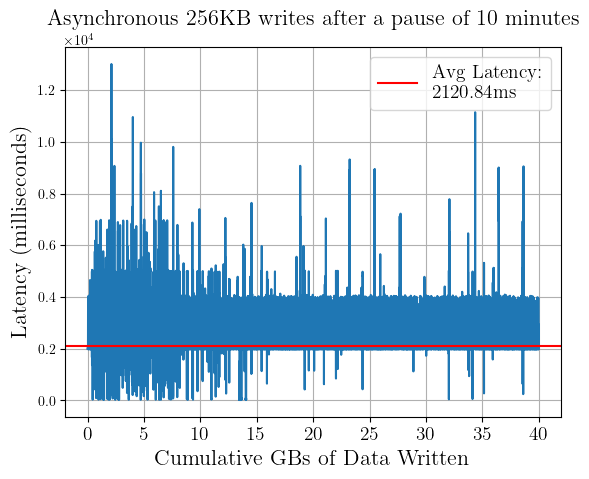

In [ ]:
df = pd.read_csv('cache-size/cleaning-stop/256KBWrite/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
# plt.yticks(np.arange(0, 15000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes after a pause of 10 minutes', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right', fontsize=14)
plt.savefig('fig/cache/pause_test_256KB_writes_run2.pdf', bbox_inches='tight')
plt.show()

### Run 3:


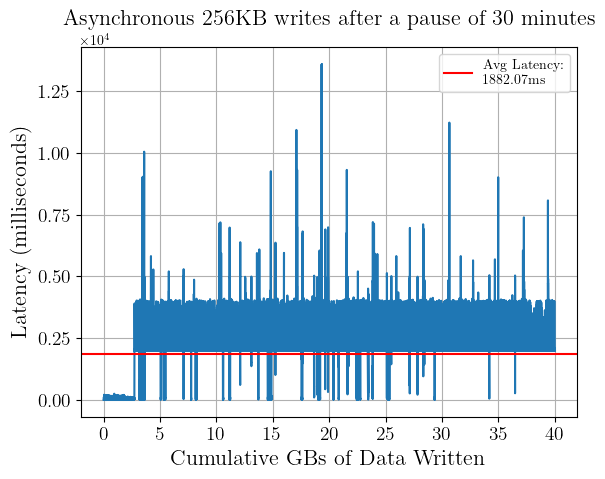

In [ ]:
df = pd.read_csv('cache-size/cleaning-stop/256KBWrite/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df['latency'] = df['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
# Create the line plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['cumulative_gb'], df['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs of Data Written', fontsize=16)
plt.xticks(np.arange(0, 45, 5), fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(np.arange(0, 15000, 2500), fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Asynchronous 256KB writes after a pause of 30 minutes', fontsize=16)

#Add the latency line
average_latency = df['latency'].mean()
average_latency_str = str(round(average_latency, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:\n' + average_latency_str)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.legend(loc='upper right')
plt.savefig('fig/cache/pause_test_256KB_writes_run3.pdf', bbox_inches='tight')
plt.show()

1 MB Pause Tests

RUN 1 (No pause) : cache-size/1MB-3_pauses_test/run1/lat_log_avg_lat.1.log

In [ ]:
df_1mb_run1 = pd.read_csv('cache-size/1MB-3_pauses_test/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run1['latency'] = df_1mb_run1['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run1['cumulative_gb'] = df_1mb_run1['write_size'].cumsum() / (1024**3)

RUN 2: (Sleep 10m) cache-size/1MB-3_pauses_test/run2/lat_log_avg_lat.1.log

In [ ]:
df_1mb_run2 = pd.read_csv('cache-size/1MB-3_pauses_test/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run2['latency'] = df_1mb_run2['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run2['cumulative_gb'] = df_1mb_run2['write_size'].cumsum() / (1024**3)


RUN 3: (Sleep 30 mins) cache-size/1MB-3_pauses_test/run3/lat_log_avg_lat.1.log

In [ ]:
df_1mb_run3 = pd.read_csv('cache-size/1MB-3_pauses_test/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run3['latency'] = df_1mb_run3['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run3['cumulative_gb'] = df_1mb_run3['write_size'].cumsum() / (1024**3)

RUN 4: (Sleep 3 hrs) cache-size/1MB-3_pauses_test/run4/lat_log_avg_lat.1.log

In [ ]:
df_1mb_run4 = pd.read_csv('cache-size/1MB-3_pauses_test/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_1mb_run4['latency'] = df_1mb_run4['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_1mb_run4['cumulative_gb'] = df_1mb_run4['write_size'].cumsum() / (1024**3)

PLOT ALL 1MB PAUSE TESTS

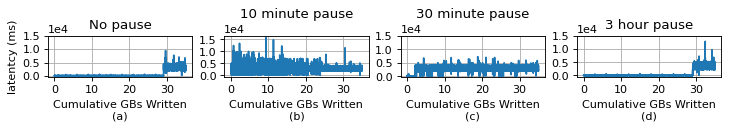

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, layout='constrained',figsize=(9, 1.5), sharey=False, dpi=80)
ax1.plot(df_1mb_run1['cumulative_gb'], df_1mb_run1['latency'], linestyle='-', label= "No pause")
ax2.plot(df_1mb_run2['cumulative_gb'], df_1mb_run2['latency'], linestyle='-', label= "10 minute pause")
ax3.plot(df_1mb_run3['cumulative_gb'], df_1mb_run3['latency'], linestyle='-', label= "30 minute pause")
ax4.plot(df_1mb_run4['cumulative_gb'], df_1mb_run4['latency'], linestyle='-', label= "3 hour pause")

ax1.title.set_text('No pause')
# ax1.xaxis.set_ticks(np.arange(0, 1400, 300))
ax1.set_xlabel('Cumulative GBs Written\n(a)')
ax1.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('latentcy (ms)')
ax1.grid(True)

ax2.title.set_text('10 minute pause')
# ax2.xaxis.set_ticks(np.arange(0, 1400, 300))
ax2.set_xlabel('Cumulative GBs Written\n(b)')
ax2.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax2.yaxis.set_ticks(np.arange(0, 20, 4))
# ax2.set_ylabel('latentcy (ms)')
ax2.grid(True)

ax3.title.set_text('30 minute pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax3.set_xlabel('Cumulative GBs Written\n(c)')
ax3.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax3.set_ylabel('latentcy (ms)')
ax3.grid(True)


ax4.title.set_text('3 hour pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax4.set_xlabel('Cumulative GBs Written\n(d)')
ax4.yaxis.set_ticks(np.arange(0, 20000, 5000))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax4.grid(True)

plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()

20 Pauses - Sync (plotting run 1 to run 5)

In [ ]:
df_256k_sync1 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync1['latency'] = df_256k_sync1['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync1['cumulative_gb'] = df_256k_sync1['write_size'].cumsum() / (1024**3)

df_256k_sync2 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync2['latency'] = df_256k_sync2['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync2['cumulative_gb'] = df_256k_sync2['write_size'].cumsum() / (1024**3)

df_256k_sync3 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync3['latency'] = df_256k_sync3['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync3['cumulative_gb'] = df_256k_sync3['write_size'].cumsum() / (1024**3)

df_256k_sync4 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync4['latency'] = df_256k_sync4['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync4['cumulative_gb'] = df_256k_sync4['write_size'].cumsum() / (1024**3)

df_256k_sync5 = pd.read_csv('cache-size/pause-seconds-20-tests/sync/run5/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_sync5['latency'] = df_256k_sync5['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_sync5['cumulative_gb'] = df_256k_sync5['write_size'].cumsum() / (1024**3)

FileNotFoundError: [Errno 2] No such file or directory: 'cache-size/pause-seconds-20-tests/sync/run1/lat_log_avg_lat.1.log'

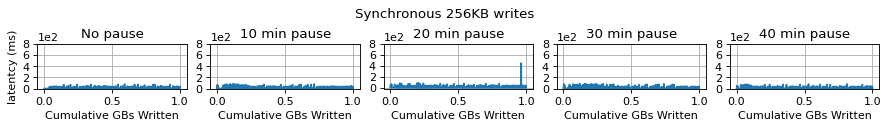

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, layout='constrained',figsize=(11, 1.5), sharey=False, dpi=80)
ax1.plot(df_256k_sync1['cumulative_gb'], df_256k_sync1['latency'], linestyle='-', label= "No pause")
ax2.plot(df_256k_sync4['cumulative_gb'], df_256k_sync2['latency'], linestyle='-', label= "10 min pause")
ax3.plot(df_256k_sync3['cumulative_gb'], df_256k_sync3['latency'], linestyle='-', label= "20 min pause")
ax4.plot(df_256k_sync4['cumulative_gb'], df_256k_sync4['latency'], linestyle='-', label= "30 min pause")
ax5.plot(df_256k_sync5['cumulative_gb'], df_256k_sync5['latency'], linestyle='-', label= "40 min pause")

ax1.title.set_text('No pause')
# ax1.xaxis.set_ticks(np.arange(0, 1400, 300))
ax1.set_xlabel('Cumulative GBs Written')
ax1.yaxis.set_ticks(np.arange(0, 1000, 200))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('latentcy (ms)')
ax1.grid(True)

ax2.title.set_text('10 min pause')
# ax2.xaxis.set_ticks(np.arange(0, 1400, 300))
ax2.set_xlabel('Cumulative GBs Written')
ax2.yaxis.set_ticks(np.arange(0, 1000, 200))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax2.yaxis.set_ticks(np.arange(0, 20, 4))
# ax2.set_ylabel('latentcy (ms)')
ax2.grid(True)

ax3.title.set_text('20 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax3.set_xlabel('Cumulative GBs Written')
ax3.yaxis.set_ticks(np.arange(0,1000, 200))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax3.set_ylabel('latentcy (ms)')
ax3.grid(True)


ax4.title.set_text('30 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax4.set_xlabel('Cumulative GBs Written')
ax4.yaxis.set_ticks(np.arange(0, 1000, 200))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax4.grid(True)

ax5.title.set_text('40 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax5.set_xlabel('Cumulative GBs Written')
ax5.yaxis.set_ticks(np.arange(0, 1000, 200))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax5.grid(True)

plt.suptitle('Synchronous 256KB writes', fontsize=12)
# plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()

256KB Async Plotting Run 1 to 5

In [ ]:
df_256k_async1 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run1/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async1['latency'] = df_256k_async1['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async1['cumulative_gb'] = df_256k_async1['write_size'].cumsum() / (1024**3)

df_256k_async2 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run2/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async2['latency'] = df_256k_async2['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async2['cumulative_gb'] = df_256k_async2['write_size'].cumsum() / (1024**3)

df_256k_async3 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run3/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async3['latency'] = df_256k_async3['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async3['cumulative_gb'] = df_256k_async3['write_size'].cumsum() / (1024**3)

df_256k_async4 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run4/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async4['latency'] = df_256k_async4['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async4['cumulative_gb'] = df_256k_async4['write_size'].cumsum() / (1024**3)

df_256k_async5 = pd.read_csv('cache-size/pause-seconds-20-tests/async/run5/lat_log_avg_lat.1.log', sep=',', names=['op1', 'latency', 'op2', 'write_size', 'op3'])
# Convert nanoseconds to microseconds for the 'time' column
df_256k_async5['latency'] = df_256k_async5['latency'] / 1000000  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_256k_async5['cumulative_gb'] = df_256k_async5['write_size'].cumsum() / (1024**3)

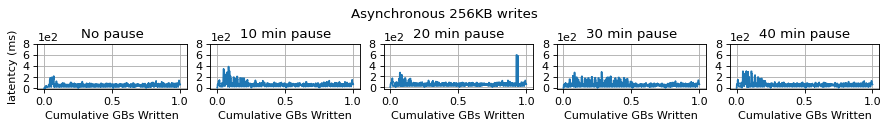

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, layout='constrained',figsize=(11, 1.5), sharey=False, dpi=80)
ax1.plot(df_256k_async1['cumulative_gb'], df_256k_async1['latency'], linestyle='-', label= "No pause")
ax2.plot(df_256k_async4['cumulative_gb'], df_256k_async2['latency'], linestyle='-', label= "10 min pause")
ax3.plot(df_256k_async3['cumulative_gb'], df_256k_async3['latency'], linestyle='-', label= "20 min pause")
ax4.plot(df_256k_async4['cumulative_gb'], df_256k_async4['latency'], linestyle='-', label= "30 min pause")
ax5.plot(df_256k_async5['cumulative_gb'], df_256k_async5['latency'], linestyle='-', label= "40 min pause")

ax1.title.set_text('No pause')
# ax1.xaxis.set_ticks(np.arange(0, 1400, 300))
ax1.set_xlabel('Cumulative GBs Written')
ax1.yaxis.set_ticks(np.arange(0, 1000, 200))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('latentcy (ms)')
ax1.grid(True)

ax2.title.set_text('10 min pause')
# ax2.xaxis.set_ticks(np.arange(0, 1400, 300))
ax2.set_xlabel('Cumulative GBs Written')
ax2.yaxis.set_ticks(np.arange(0, 1000, 200))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax2.yaxis.set_ticks(np.arange(0, 20, 4))
# ax2.set_ylabel('latentcy (ms)')
ax2.grid(True)

ax3.title.set_text('20 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax3.set_xlabel('Cumulative GBs Written')
ax3.yaxis.set_ticks(np.arange(0,1000, 200))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax3.set_ylabel('latentcy (ms)')
ax3.grid(True)


ax4.title.set_text('30 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax4.set_xlabel('Cumulative GBs Written')
ax4.yaxis.set_ticks(np.arange(0, 1000, 200))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax4.grid(True)

ax5.title.set_text('40 min pause')
# ax3.xaxis.set_ticks(np.arange(0, 1400, 300))
ax5.set_xlabel('Cumulative GBs Written')
ax5.yaxis.set_ticks(np.arange(0, 1000, 200))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax4.set_ylabel('latentcy (ms)')
ax5.grid(True)
plt.suptitle('Asynchronous 256KB writes', fontsize=12)

# plt.savefig('/Users/Puneet89/scratch/fast24/fig/cache/pause_test_1MB_all.pdf',bbox_inches='tight')
plt.show()